# Homework: Photovoltaic
Fabian Schmid | Institut für Energietechnik | FG EVUR | Berlin

## Content:
- Photovoltaic exercise
- Photovoltaic homework

The photovoltaic homework builds on the exercise.
You can answer and work on it in the Jupyter notebook or a Spyder file.


## Solar position
Calculate Solar position with pvlib method pvlib.solarposition.get_solarposition

https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.solarposition.get_solarposition.html

- Define DateTimeIndex
- Define location
- Implement and call pvlib method


### DateTime Index
- Date Time Index is created with method pandas.date_range

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

**TASK: Specify and insert the necessary parameters into the function:**
- Start date: '2019-01-01'
- End date: '2020-01-01'
- Argument: close: 'left'
- Frequence: freq: 'H'
    - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

In [1]:
# Load libaries
import pandas as pd

# Define timeindex
timeindex = pd.date_range(start='2019-01-01',
                          end='2020-01-01',
                          closed='left',
                          freq='H')
timeindex

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

### Implement and call pvlib method

- pvlib.solarposition.get_solarposition
    - https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.solarposition.get_solarposition.html


We need to specifiy the location of our system, which is Greifswald, Germany:
- latitude = 54.096
- longitude = 13.383
- altitude = 19

**TASK:**
- Insert the specified datetimeindex into the function
- Insert the location data needed into the function


In [2]:
# Load libaries
import pvlib

# Call pvlib solar position method
sun_position = pvlib.solarposition.get_solarposition(time=timeindex,
                                                     latitude=54.096,
                                                     longitude=13.383,
                                                     altitude=19,
                                                     method='nrel_numpy')
sun_position

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2019-01-01 00:00:00,147.533377,147.533377,-57.533377,-57.533377,21.928790,-3.195874
2019-01-01 01:00:00,142.685776,142.685776,-52.685776,-52.685776,44.652294,-3.215687
2019-01-01 02:00:00,135.591011,135.591011,-45.591011,-45.591011,62.834265,-3.235491
2019-01-01 03:00:00,127.324798,127.324798,-37.324798,-37.324798,77.629140,-3.255288
2019-01-01 04:00:00,118.593006,118.593006,-28.593006,-28.593006,90.391458,-3.275076
...,...,...,...,...,...,...
2019-12-31 19:00:00,124.593573,124.593573,-34.593573,-34.593573,278.088551,-2.982273
2019-12-31 20:00:00,133.067197,133.067197,-43.067197,-43.067197,292.104325,-3.002181
2019-12-31 21:00:00,140.631226,140.631226,-50.631226,-50.631226,309.049860,-3.022080
2019-12-31 22:00:00,146.333118,146.333118,-56.333118,-56.333118,330.284623,-3.041970


- apparent_zenith : apparent sun zenith accounting for atmospheric refraction (Lichtbrechung)
- zenith : Solar zenith angle
    - The zenith angle is the angle between the sun and the vertical, thus making the zenith angle = 90° - elevation.
- apparent_elevation : apparent sun elevation accounting for atmospheric refraction
- elevation : actual elevation (not accounting for refraction) of the sun in decimal degrees, 0 = on horizon, the complement of the zenith angle
- equation of time: describes the discrepancy between the apparent solar time (directly tracks the diurnal motion of the sun) and the mean solar time (tracks a theoretical mean sun with uniform motion)


**--> We use apparent values in PV modeling**

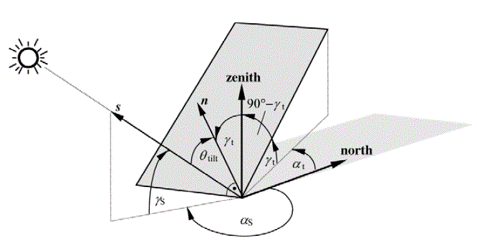

### Access of solar position DataFrame

Select specific dates of the result DataFrame, which holds the solar position over the day

- Select parts of solar_position dataframe with df.loc[]

    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

- Easily access the wanted column from a pandas Dataframe with the column name, *['column_name']*

    - https://pandas.pydata.org/docs/user_guide/indexing.html 

- Easily plot the pandas Series or DataFrame
    - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
    

<AxesSubplot:>

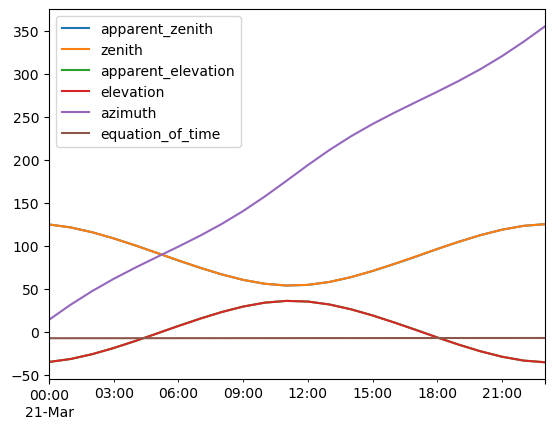

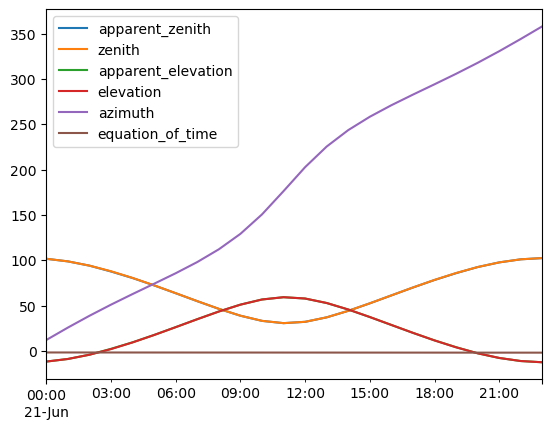

In [3]:
# Exstract specific date of the sun position DataFrame
sun_position_spring = sun_position.loc['2019-03-21']
sun_position_summer = sun_position.loc['2019-06-21']

sun_position_spring.plot()
sun_position_summer.plot()

## Solar irradiation on tilted panel

Load irradiation data of the location Greifswald and calculate the irradiation on the tilted PV panel with pvlib method pvlib.irradiance.get_total_irradiance

- Load irradiation data
- Define PV panel orientation (azimuth, inclination)
- Implement and call pvlib method


### Load irradiation data
pandas.read_csv() is used to load csv irradiation file

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

- Irradiation data (irradiation_greifswald.csv) and weather data (weather_greifswald.csv) should be included in the folder 'Photovoltaic_exercise' you donwloaded from ISIS and in which your jupyter notebook is saved.

**TASK**
- Load weather data

In [4]:
# Load libaries
import pandas as pd

# Load irradiaion data
irradiation = pd.read_csv('irradiation_greifswald.csv', comment='#', header=0, decimal='.', sep=';')

# Load weather data
weather = pd.read_csv('weather_greifswald.csv', comment='#', header=0, decimal='.', sep=';')


irradiation
#weather

,Observation period,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability
0,2019-01-01T00:00:00.0/2019-01-01T01:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2019-01-01T01:00:00.0/2019-01-01T02:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2019-01-01T02:00:00.0/2019-01-01T03:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2019-01-01T03:00:00.0/2019-01-01T04:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2019-01-01T04:00:00.0/2019-01-01T05:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31T19:00:00.0/2019-12-31T20:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8756,2019-12-31T20:00:00.0/2019-12-31T21:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8757,2019-12-31T21:00:00.0/2019-12-31T22:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8758,2019-12-31T22:00:00.0/2019-12-31T23:00:00.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Implement and call pvlib method

- pvlib.irradiance.get_total_irradiance
    - https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.irradiance.get_total_irradiance.html


**Following arguments need to be specified:**

- Panel orientation:
    - PV panel inclination - tilt angle: 0° horizontal plane, 90° vertical plane
        - We set an inclination angle of 35°
    - PV panel azimuth angle: 0° North, 90° East, 180° South, 270° West
        - We set a azimuth angle of 180° - south

- Solar position as zenith and elevation angle (we use apparent zenith angle)
    - Access possible through name of column, e.g. *sun_position['apparent_zenith']*
    - Attention: Solar position needs to be specified as pandas Series 
    
- Irradiance values
    - dni – Direct Normal Irradiance. [W/m2]
    - ghi – Global horizontal irradiance. [W/m2]
    - dhi – Diffuse horizontal irradiance. [W/m2]
    - Attention: Irradiance needs to be specified as numpy array
        - Transformation easily with *irradiation['BNI'].values*
    - Attention: Method takes irradiance values as input. As we have hourly resolution irradiation [Wh/m2] = irradiance [W/m2]

- Albedo value
    - We a assume a albedo of 0.25 (standard value)

- The used diffuse irradiance model
    - We use the simple 'isotropic' model
    

  
**The function returns following parameter:**
- poa_global, poa_direct, poa_diffuse, poa_sky_diffuse and poa_ground_diffuse
    - poa_global = poa_direct + poa_diffuse
    - poa_global = poa_direct + poa_sky_diffuse + poa_ground_diffuse


**TASK**
- Insert the solar position angles, which we calculated for our location into the function: apparent_zenith and azimuth
- ghi: Insert the global horizontal irradiance into the function from the loaded irradiation dataset
    - This needs to be a numpy array

    - Hint: as both parameters are inside a pandas DataFrame you can easily access the specific columns by *['column_name']*, transformation into numpy array with *.values*

In [5]:
# Load libaries
import pvlib

# Call pvlib irradiance method with assumed albedo of 0.25 and the simple isotropic diffuse model approach
irradiance_poa = pvlib.irradiance.get_total_irradiance(surface_tilt=35,
                                                       surface_azimuth=180,
                                                       solar_zenith=sun_position['apparent_zenith'],
                                                       solar_azimuth=sun_position['azimuth'],
                                                       dni=irradiation['BNI'].values,
                                                       ghi=irradiation['GHI'].values,
                                                       dhi=irradiation['DHI'].values,
                                                       albedo=0.25,
                                                       model='isotropic')

# As we have hourly resolution irradiance=irradiation
irradiation_poa = irradiance_poa
#irradiation_poa.loc['2019-06-01']

### Plotting of irradiation data on tilted plane
- You can again easily plot the total or parts of the irradiation plane on array result DataFrame
    - just use the build in plotting function of pandas plot()
        - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html


In [6]:
irradiation_poa

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2019-01-01 00:00:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-31 19:00:00,0.0,-0.0,0.0,0.0,0.0
2019-12-31 20:00:00,0.0,-0.0,0.0,0.0,0.0
2019-12-31 21:00:00,0.0,-0.0,0.0,0.0,0.0
2019-12-31 22:00:00,0.0,-0.0,0.0,0.0,0.0


<AxesSubplot:>

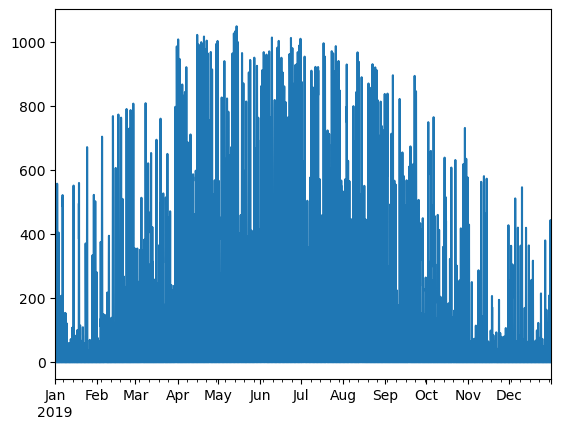

In [7]:
# Easily plot the irradiation_poa dataset
irradiation_poa['poa_global'].plot()

## Photovoltaic power output and energy yield
- Calculate MPP power of PV panel
- Calculate energy yield


### Canadian Solar CS5P datasheet
- We use the CS5P-250M with output power 250W
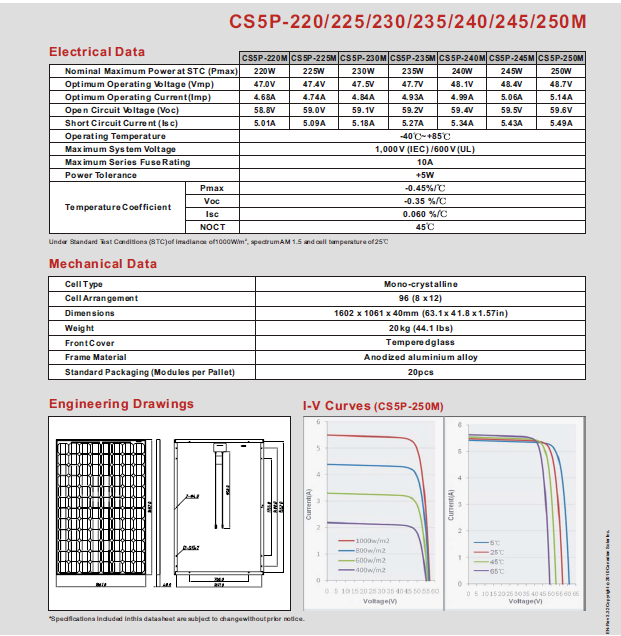


To calculate PV MPP power out put we use following function:
- pvlib.pvsystem.pvwatts_dc()
    - https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.pvsystem.pvwatts_dc.html
- We need the PV cell temperature for this function, as it is main influencing parameter besides irradiation level

### PV cell temperature 

- Determine PV cell temperature using the Sandia Array Performance Model 
- pvlib.temperature.sapm_cell 
    - https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.temperature.sapm_cell.html
    
    
**Following parameter need to be specified:**
- Global poa irradiance timeseries data [W/m2]
- Ambient temperature data from our weather_data DataFrame (loaded csv data) [°C]
- Wind speed [m/s]
    - Data series of irradiation, tempertaure and wind speed needs to be specified as numpy array with *['column_name'].values*
- Assumption of a glass/polymer module 
    - a=-3.56, b=-0.075, deltaT=3


**It returns the PV cell temperatue in Kelvin and as a numpy array - no pandas.DataFrame**

**TASK:**
- Insert the missing values for irradiation_poa we just calculated
- Insert the missing values for ambient tempertaure and wind speed we loaded from the csv weather file

In [8]:
# Calculate PV cell temperature
mod_temperature = pvlib.temperature.sapm_cell(poa_global=irradiation_poa['poa_global'].values, 
                                              temp_air=weather['Temperature'].values, 
                                              wind_speed=weather['Wind speed'].values, 
                                              a=-3.56,
                                              b=-0.075,
                                              deltaT=3)
mod_temperature

array([279.59, 279.39, 279.39, ..., 275.53, 275.56, 275.61])

### PV MPP power output timeseries
To calculate PV MPP power out put we use following function:
- pvlib.pvsystem.pvwatts_dc()
    - https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.pvsystem.pvwatts_dc.html
    
**Following parameter need to be specified:**

- g_poa_effective – Irradiance transmitted to the PV cells as poa [W/m^2]
- temp_cell – Cell temperature [C].
- pdc0 – Nominal power of the modules [W]
- gamma_pdc – The temperature coefficient of power. [1/C]
    - This is 0.0045 compare the PV datasheet


**The function returns the PV MPPT power output as numpy array - no pandas.DataFrame**

**TASK:**
- Insert the mssing values for the PV tempertaure in °C

In [9]:
# Alterbative way of calculating MPP power
power_module = pvlib.pvsystem.pvwatts_dc(g_poa_effective=irradiation_poa['poa_global'].values,
                                         temp_cell=(mod_temperature-273.15),
                                         pdc0=250,
                                         gamma_pdc=0.0045)

power_module

array([0., 0., 0., ..., 0., 0., 0.])

### Energy yield calculation

- Transfer the MPP power array into an pandas.Series with a Dateimtimeindex
    - Define a timeindex with pandas.date_range() --> we alreday defined this.
        - https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
    - Define a pandas Series with pandas.Series()
        - https://pandas.pydata.org/docs/reference/api/pandas.Series.html
        
        
- Resample your datafrme to an annual, monhtly and daily resolution using pandas.resample()
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

- Calculate the daily, monthly and annual energy yield of your PV panel and plot the results
    - As we have an hourly resolution W can be easily converted into Wh without any numerical adaption

**TASK:**
- Calculate the daily, monthly and annual energy yield of the panel

<AxesSubplot:>

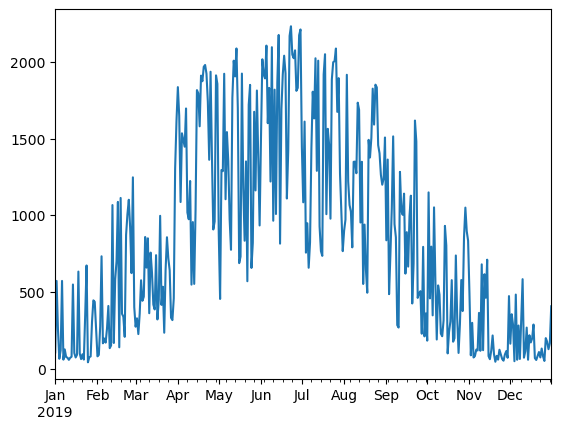

In [10]:
# Add to pandas series datetimeindex
# Define pandas Series with PV MPP power
power_module = pd.Series(power_module,
                         index=timeindex)


# Resample the hourly timesereis to monthly and annual timeseries
energy_module_d = power_module.resample('D').sum()
energy_module_m = power_module.resample('M').sum()
energy_module_y = power_module.resample('Y').sum()

energy_module_d.plot()


## Transfer Juypter notebook to Spyder

# Homework part
- Photovoltaic system power output with UI curve model
- PV inverter
- System sizing and system energy yield


## Photovoltaic system power output
Calculate VI curve of PV panel for irradiation timeseries asmore detailed alternative to simple MPP function we used in the exercise

- Load pvlib PV module database
- Calculate VI curve parameters
- Calculate VI curve and MPP power of each timestep

### Pvlib PV module database
Databases can be directly downloaded via pvlib method pvlib.pvsystem.retrieve_sam
- https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.pvsystem.retrieve_sam.html
- We save it for a n easy access in case you want to have a look at the database

Select PV module 'Canadian_Solar_Inc__CS5P_250M' and extract parameters

In [11]:
# load CEC module db from SAM
moddb = pvlib.pvsystem.retrieve_sam('CECMod')
# save db to csv
moddb.to_csv('CEC_Modules.csv', sep=';')


# Print all module names (columns of db)
modnames = moddb.columns
modnames

# Select module
modparameter = moddb['Canadian_Solar_Inc__CS5P_250M']
modparameter

Technology            Mono-c-Si
Bifacial                      0
STC                     250.318
PTC                       227.3
A_c                       1.639
Length                    1.579
Width                     1.038
N_s                          96
I_sc_ref                   5.49
V_oc_ref                   59.6
I_mp_ref                   5.14
V_mp_ref                   48.7
alpha_sc               0.002031
beta_oc               -0.185952
T_NOCT                     44.5
a_ref                  2.448949
I_L_ref                5.495937
I_o_ref                     0.0
R_s                    0.702369
R_sh_ref             649.490906
Adjust                13.373722
gamma_r                  -0.445
BIPV                          N
Version       SAM 2018.11.11 r2
Date                   1/3/2019
Name: Canadian_Solar_Inc__CS5P_250M, dtype: object

### Calculate VI curve parameters
VI curve parameters can be calculated using parameters from PV module database and the method pvlib.pvsystem.calcparams_desoto()

- Function needs timeseries data as numeric array (pandas.Series or DataFrame is not supported as input)
- Energy bandgap at reference temperature EgRef=1.121 and the temperature dependence of the energy bandgap at reference conditions dEgdT=-0.0002677 are set according to pvlib Crystalline Silicon (Si).

- Attention: PV cell temperature needs to be defined in °C and not Kelvin as returned by sapm_cell()

  
- Check the function documentation for the parameter explanation
    - https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.pvsystem.calcparams_desoto.html

**TASK**
- Insert the necessary module parameters of the module 'Canadian_Solar_Inc__CS5P_250M'
    - alpha_sc - The short-circuit current temperature coefficient of the module
    - a_ref - The product of the usual diode ideality factor, number of cells in series, and cell thermal voltage at reference conditions
    - I_L_ref - The light-generated current (or photocurrent) at reference conditions
    - I_o_ref - The dark or diode reverse saturation current at reference conditions
    - R_sh_ref - The shunt resistance at reference conditions
    - R_s - The series resistance at reference conditions

In [12]:
# Calculate VI curve parameters with module parameters and irradiation/weather data
IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_cec(effective_irradiance=irradiation_poa['poa_global'],
                                                        temp_cell=(mod_temperature-273.15),
                                                        alpha_sc=modparameter['alpha_sc'],
                                                        a_ref=modparameter['a_ref'],
                                                        I_L_ref=modparameter['I_L_ref'],
                                                        I_o_ref=modparameter['I_o_ref'],
                                                        R_sh_ref=modparameter['R_sh_ref'],
                                                        R_s=modparameter['R_s'],
                                                        Adjust=modparameter['Adjust'],
                                                        EgRef=1.121,
                                                        dEgdT=-0.0002677
                                                        )

### Calculate VI curve and MPP power of each timestep

- Call single diode method pvlib.pvsystem.singlediode() with determined parameters
    - Use calculated VI curve parameters
    - Calculate 100 VI curve points
    - Use method: Lambert W function as numerical solving to solve implicit diode equation: 'lanbertW'

https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.pvsystem.singlediode.html

**TASK:**
- Insert missing values for photocurrent, saturation_current, resistance_series, resistance_shunt

In [13]:
# Calculate VI curve with SDE equation and determined parameters
vi_curve = pvlib.pvsystem.singlediode(photocurrent=IL,
                                      saturation_current=I0,
                                      resistance_series=Rs,
                                      resistance_shunt=Rsh,
                                      nNsVth=nNsVth,
                                      ivcurve_pnts=100,
                                      method='lambertw'
                                      )

Function returns an Ordered Dictionary containing:
- i_sc - short circuit current in amperes.
- v_oc - open circuit voltage in volts.
- i_mp - current at maximum power point in amperes.
- v_mp - voltage at maximum power point in volts.
- p_mp - power at maximum power point in watts.
- i_x - current, in amperes, at v = 0.5*v_oc.
- i_xx - current, in amperes, at V = 0.5*(v_oc+v_mp).

If ivcurve_pnts is greater than 0, the output dictionary will also include:
- i - IV curve current in amperes.
- v - IV curve voltage in volts.


You can access the data of a dict with th socalled keys (comparable to the columns in DataFrames): *['key_name']*

**TASK:**
- Extract the power at maximum power point of the result Orderdict vi_curve
- This is a numpy array, convert it to a pandas.Series and plot it with the buildin pandas plotting function

<AxesSubplot:>

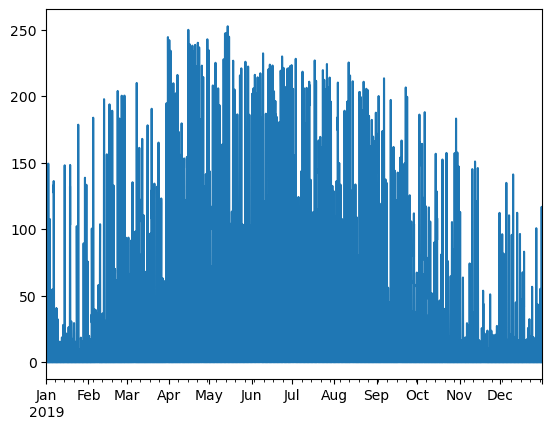

In [14]:
# Extract and plot MPP power of module
vi_curve_power_mpp = vi_curve.get('p_mp')

# Transfer it to a pandas.series
vi_curve_power_mpp = pd.Series(vi_curve_power_mpp, index=timeindex)

# Plotting
vi_curve_power_mpp.plot()

### Calculate Inverter output power

- The generic average inverter model NREL PVWatts is used
    - https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.inverter.pvwatts.html

- Detailed Documentation: https://pvwatts.nrel.gov/downloads/pvwattsv5.pdf

- For setting parameters we use the datasheet of SolarEdge SE6K
    - pdc0 – DC input limit of the inverter = 8100
    - eta_inv_nom (default 0.96) – Nominal inverter efficiency = 0.973 (EU eff)
    - eta_inv_ref (default 0.9637) – Reference inverter efficiency (optional for flexibility)

**TASK:**
- Calculate the power loss of the inverter through the difference between PV mppt power input and inverter ac power output
- Why do we have such a low efficiency or high inverter power loss?

<AxesSubplot:>

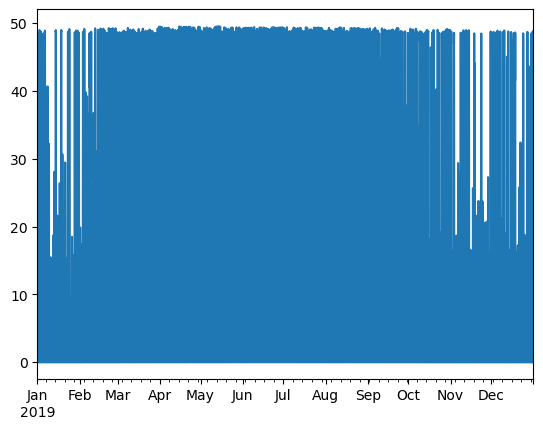

In [15]:
# Calculate inverter output power
power_inverter_ac = pvlib.inverter.pvwatts(pdc=vi_curve_power_mpp.values, 
                                           pdc0=8100,
                                           eta_inv_nom=0.973,
                                           eta_inv_ref=0.9637)

inverter_power_loss = (vi_curve_power_mpp.values - power_inverter_ac)

# Transfer it to a pandas.series
inverter_power_loss = pd.Series(inverter_power_loss,
                             index=timeindex)

inverter_power_loss.plot()

## Sizing system

- Selection of inverter and string sizing
    - PV panel: Canadian Solar CS5P-250M
    - Inverter: Solaredge SE3K-SE10K
- Energy yield calculation

### SolarEdge Inverter datasheet
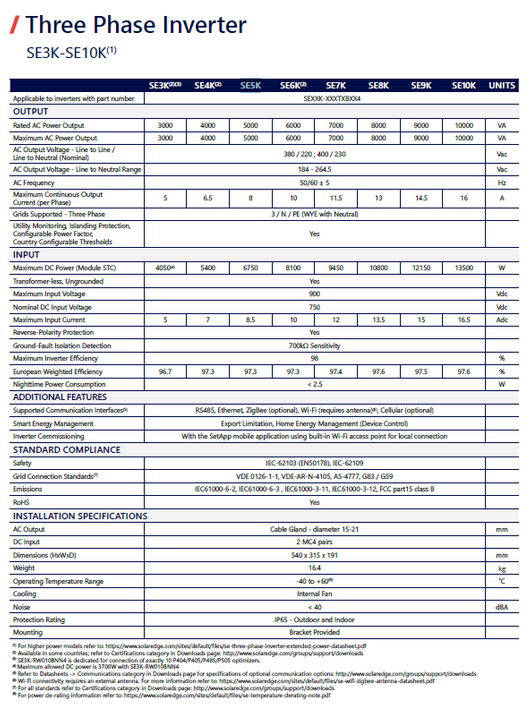

### Selection of inverter and string sizing

Maximum string size (voltage sizing)
- Inverter must be able to take maximum string voltage (reason: safety and inverter warranty especially during coldest winter days)

    - Assume minimum ambient temperature -14°C
    
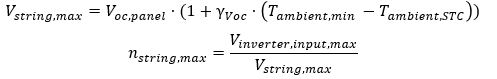

Minimum string size (voltage sizing)
- Inverter minimum input voltage should be below minimum string voltage (reason: good performances even at hottest summer days)
    - Assume maximum Pv cell temperature of 70°C and a minimum inverter voltage of 100V

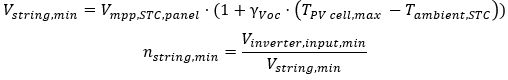

Maximum number of strings (current sizing)
- The short circuit current of the PV array should be below the inverter maximum input current

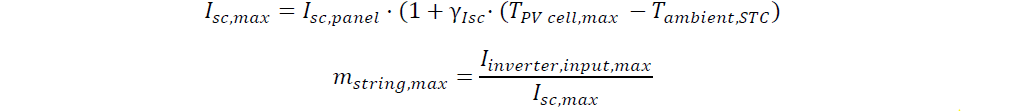



- Calculation/selection based on datasheet information

**TASK:**
- Do the minimum string sizing and the sizing of the maximum number of strings, assuming we want to use the SolarEdge SE7K inverter
- All necessary data is given in the datasheet, assumed temperature assumptions in the cell above

  
- **How would you size your PV array?**

In [16]:
# Calculation based on datasheet information
# Inverter parameters
voltage_inverter_max = 900
voltage_inverter_min = 100 # not specified in datasheet
current_inverter_max = 12 #(SE7K)
v_oc_panel = modparameter['V_oc_ref']
T_amb_min = -14
T_amb_STC = 25
gamma_voc = -0.0035
gamma_isc = 0.00060
T_PV_cellmax = 70
V_mpp_panel = modparameter['V_mp_ref']
I_sc_panel = modparameter['I_sc_ref']



# Maximum string size
voltage_string_max = v_oc_panel*(1+gamma_voc*(T_amb_min - T_amb_STC))
number_panels_strings_max = voltage_inverter_max / voltage_string_max
print('number_panels_strings_max:', round(number_panels_strings_max,2))

# Minimum string size
voltage_string_min = V_mpp_panel*(1+gamma_voc*(T_PV_cellmax - T_amb_STC))
number_panels_strings_min = voltage_inverter_min / voltage_string_min
print('number_panels_strings_min:', round(number_panels_strings_min,2))

# Maximum number of strings
current_string_max = I_sc_panel*(1+gamma_isc*(T_PV_cellmax - T_amb_STC))
number_strings_max = current_inverter_max / current_string_max
print('number_strings_max:', round(number_strings_max,2))

number_panels_strings_max: 13.29
number_panels_strings_min: 2.44
number_strings_max: 2.13


## System sizing Inverter and PV array and energy yield calculation
**TASK:**
- Select a proper inverter and define your PV array with numer of strings and number of PV modules per string (use the Canadian CS5P-250M with output power 250W)
    - Your PV array consists of strings and number of PV panels connected in series, be sure you now calculate the howl PV array and not a single PV panel!!!
- Calculate again the inverter output AC power with your defined PV array 
    - In case you are not able to size it, use 2 strings with each 13 PV modules, which results into 26 modules with each 250Wp
- Calculate the annual energy yield (AC inverter output energy) for your system
- Calculate the annual capacity factor (AC inverter output energy) of your system and compare it with data given by Renewables.ninja
    

In [17]:
# Calculate maximum power in case we want to install 26 PV panels
number_panels = 26
# round(number_panels_strings_max * number_strings_max)
power_mpp_array_installed = number_panels * 250
print('Maximum power of', number_panels,'modules PV array:', power_mpp_array_installed, 'W')

Maximum power of 26 modules PV array: 6500 W


In [22]:
# Calculation based on datasheet information
# Inverter parameters
voltage_inverter_max = 900
voltage_inverter_min = 100 # not specified in datasheet
current_inverter_max = 8.5 #(SE5K)
v_oc_panel = modparameter['V_oc_ref']
T_amb_min = -14
T_amb_STC = 25
gamma_voc = -0.0035
gamma_isc = 0.00060
T_PV_cellmax = 70
V_mpp_panel = modparameter['V_mp_ref']
I_sc_panel = modparameter['I_sc_ref']



# Maximum string size
voltage_string_max = v_oc_panel*(1+gamma_voc*(T_amb_min - T_amb_STC))
number_panels_strings_max = voltage_inverter_max / voltage_string_max
print('number_panels_strings_max:', round(number_panels_strings_max,2))

# Minimum string size
voltage_string_min = V_mpp_panel*(1+gamma_voc*(T_PV_cellmax - T_amb_STC))
number_panels_strings_min = voltage_inverter_min / voltage_string_min
print('number_panels_strings_min:', round(number_panels_strings_min,2))

# Maximum number of strings
current_string_max = I_sc_panel*(1+gamma_isc*(T_PV_cellmax - T_amb_STC))
number_strings_max = current_inverter_max / current_string_max
print('number_strings_max:', round(number_strings_max,2))

number_panels_strings_max: 13.29
number_panels_strings_min: 2.44
number_strings_max: 1.51


In [23]:
number_modules_strings = 13
number_strings = 2

# Calculate array MPP voltage for all timesteps
voltage_mpp_array = vi_curve.get('v_mp') * number_modules_strings

# Calculate array MPP current for all timesteps
current_mpp_array = vi_curve.get('i_mp') * number_strings

# Calculate array MPP power 
power_mpp_array = voltage_mpp_array * current_mpp_array

In [24]:
# Calculate inverter AC output power
power_inverter_ac_array = pvlib.inverter.pvwatts(pdc=power_mpp_array, 
                                                 pdc0=6750, #SE7K
                                                 eta_inv_nom=0.973,
                                                 eta_inv_ref=0.9637)

In [25]:
# Calculate annual ac energy yield
energy_ac_array_annual = power_inverter_ac_array.sum()

print('Annual AC array energy yield [kWh]:', energy_ac_array_annual)

Annual AC array energy yield [kWh]: 7603313.584658213


In [26]:
# Calculate annual capacity factor (based on AC inverter output)

capacity_factor_annual = energy_ac_array_annual/ (power_mpp_array_installed*8760)

print('Annual PV AC capacity factor [1]:', capacity_factor_annual)

Annual PV AC capacity factor [1]: 0.13353202642532863


**TASK:**

- Compare your determined annual PV capacity factor with data provided by Renewable.Ninja
    - https://www.renewables.ninja/
    - Location Greifswald: longitude=54.096, latitude=13.383
    - It shows a total annual capacity factor of 12.4 %
    
- Why is your calculated annual capacity factor higher than results by Renewable.Ninja? 